# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 

#### 1. What is the outcome?

Answer: 
Users will either convert or not to paying customers.

#### 2. What are the predictors/covariates? 

Answer: 
The predictors are: age, gender, location, profession, customer usage data and days since last log in.

#### 3. What timeframe is this data relevent for?

Answer: 
Jan thru Apr 2015

#### 4. What is the hypothesis?

Answer: 
My hyporhesis is high data usage and least days since last log in will determine customer conversion.


## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable | Values
---| ---| ---
Resp  | UCLA grad admission yes or no | categorical | 0 = not admitted to 1 = yes admitted
Pred 1 | gre score | continuous | 200 - 800
Pred 2 | gpa score  | continuous | 2.00 - 4.00
Pred 3 | prestige/school rank | categorical | 1 = most to 4 = least 

We would like to explore the association between X and Y 

#### 1. What is the outcome?

Answer: 
Student application admitted into UCLA graduate school program.

#### 2. What are the predictors/covariates? 

Answer:
    
Variable | Description |
---| ---| ---
Pred 1 | gre score | 
Pred 2 | gpa score  | 
Pred 3| prestige/school rank |

#### 3. What timeframe is this data relevent for?

Answer: 
The data and results will be relevant as long as the requiredments stay the same.

#### 4. What is the hypothesis?

Answer: 
Students with high GRE scores, GPA, and prestige are more likely to be admitted into UCLA's graduate program.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
%matplotlib inline

C:\Users\fcama\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read data file from local drive
df = pd.read_csv('C:/Users/fcama/Desktop/admissions.csv')

In [3]:
# Print first 5 rows to see what data looks like
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [4]:
# Data Summary for admit, gre, gpa and prestige
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
# Standard Deviation for each 
df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [6]:
# Prestige frequency table admitted or not
pd.crosstab(df['admit'],df['prestige'],rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


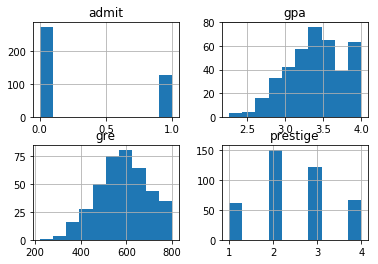

In [7]:
# Plot all of the columns
df.hist()
pl.show()

In [8]:
# Dummifying prestige valiables
dummy_prestige = pd.get_dummies(df["prestige"], prefix="prestige")
dummy_prestige.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [9]:
# Clean data set for regression
cols_to_keep = ["admit","gre","gpa"]
data = df[cols_to_keep].join(dummy_prestige.ix[:, 'prestige_2':])
data.head()

C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


In [10]:
data.dropna()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1
5,1,760.0,3.00,1,0,0
6,1,560.0,2.98,0,0,0
7,0,400.0,3.08,1,0,0
8,1,540.0,3.39,0,1,0
9,0,700.0,3.92,1,0,0


In [18]:
# Manually add the intercept
data['intercept'] = 1.0

In [19]:
train_cols = data[data.columns[1:]]
logit = sm.Logit(data['admit'], train_cols)
# Fit model
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: nan
         Iterations 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                           -1
Date:                Fri, 17 Nov 2017   Pseudo R-squ.:                     nan
Time:                        00:16:52   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                       nan
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre                 nan        nan        nan        nan         nan         nan
gpa                 nan        nan        nan        nan         nan         nan
prestige_2.0        nan        nan        nan        nan         nan         nan
prestige_3.0        nan        nan        nan        nan         nan         nan
prestige_4.0        nan        nan        nan        nan         nan         nan
intercept           nan        nan        nan        nan         nan         nan
================================================================================
"""

In [20]:
logit = sm.Logit(data['admit'], train_cols)
logit

In [21]:
train_cols.describe()

,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
count,398.000000,398.00000,400.000000,400.000000,400.000000,400.0
mean,588.040201,3.39093,0.375000,0.302500,0.167500,1.0
std,115.628513,0.38063,0.484729,0.459916,0.373889,0.0
min,220.000000,2.26000,0.000000,0.000000,0.000000,1.0
25%,520.000000,3.13000,0.000000,0.000000,0.000000,1.0
50%,580.000000,3.39500,0.000000,0.000000,0.000000,1.0
75%,660.000000,3.67000,1.000000,1.000000,0.000000,1.0
max,800.000000,4.00000,1.000000,1.000000,1.000000,1.0


In [15]:
result.conf_int()

,0,1
gre,NaN,NaN
gpa,NaN,NaN
prestige_2.0,NaN,NaN
prestige_3.0,NaN,NaN
prestige_4.0,NaN,NaN
intercept,NaN,NaN


In [16]:
# odds rations only
np.exp(result.params)

gre            NaN
gpa            NaN
prestige_2.0   NaN
prestige_3.0   NaN
prestige_4.0   NaN
intercept      NaN
dtype: float64

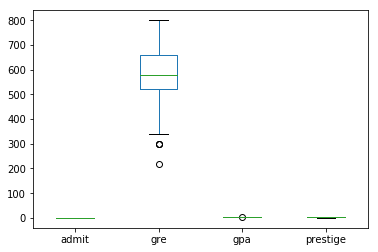

In [17]:
df.plot(kind="box")

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer:

#### 2a. What are the assumptions of the distribution of data? 

Answer:

#### 2b. How will you determine the distribution of your data? 

Answer:

#### 3a. How might outliers impact your analysis? 

Answer:
It will impact the accuracy of results.

#### 3b. How will you test for outliers? 

Answer:
  * Look for null values
  * Look for mixed data dypes
  * Look for high and low values
  * Graph the data

#### 4a. What is colinearity? 

Answer:
In statistics is two or more predictor variables in a multiple regression model are highly correlated.
One variable can be linearly predicted from the others with a substancial degree of accuracy.

#### 4b. How will you test for colinearity? 

Answer:

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer:

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model